In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from adjustText import adjust_text

In [28]:
plt.style.use('default')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
plt.rcParams['axes.facecolor']='white'

In [72]:
pal = sns.color_palette("colorblind")

In [4]:
var_info_tbl = pd.read_csv("../../results/model_runs/bean_negctrl/bean_run_result.bean_count_LDLvar_annotated/bean_element_result.MixtureNormal+Acc.csv", index_col=0)
allele_info_tbl = pd.read_excel("../../resources/LDLvar/20221013_LDLvar_simpleZscores_credset.xlsx", index_col=0, header=1)
ctrl_tbl = pd.read_excel("20230822_ATAC_demuxed_analysis_result.xlsx", "ctrl", index_col=0)
atac_caqtl_tbl = pd.read_excel("20230822_ATAC_demuxed_analysis_result.xlsx", "allele enrichment summary", index_col=0)
atac_be_tbl = pd.read_excel("20230822_ATAC_demuxed_analysis_result.xlsx", "edit enrichment summary", index_col=0)

In [5]:
allele_info = allele_info_tbl[["A1", "A2", "HepG2 alternate allele fraction"]]

In [6]:
allele_info

,A1,A2,HepG2 alternate allele fraction
labels,,,
rs7629_Maj_ABE_300,A,G,0.000
2:118868389AAACA_Maj_ABE_8,NaN,NaN,NaN
rs116734477_Maj_ABE_51,C,T,0.000
rs62084210_Maj_ABE_250,A,G,0.333
rs72729610_Maj_ABE_283,A,G,0.000
...,...,...,...
CONTROL_18,NaN,NaN,NaN
CONTROL_15,NaN,NaN,NaN
CONTROL_19,NaN,NaN,NaN


In [7]:
ctrl_tbl = ctrl_tbl.set_index("var_id").join(allele_info, how='left').reset_index()
atac_caqtl_tbl = atac_caqtl_tbl.set_index("var_id").join(allele_info, how='left').reset_index()
atac_be_tbl = atac_be_tbl.set_index("var_id").join(allele_info, how='left').reset_index()

In [8]:
sig_edited_vars = ctrl_tbl.loc[ctrl_tbl['sig(a=0.1)|trt'] == 1.0, "var_id"]

In [9]:
sig_edited_vars

1     rs10107182_Min_ABE_351
4     rs115421711_Maj_ABE_45
8          rs704_Min_ABE_550
9     rs11149612_Min_ABE_369
12     rs12042481_Maj_ABE_54
13    rs58198139_Min_ABE_523
14     rs2618566_Min_ABE_453
15    rs35081008_Min_ABE_465
17      rs402348_Maj_ABE_201
18     rs8126001_Min_ABE_574
Name: var_id, dtype: object

In [10]:
atac_be_merged = var_info_tbl[['target', 'mu_adj', 'mu_z_adj']].merge(atac_be_tbl.rename(columns={'var_id':"target"}), on='target')

In [210]:
atac_be_merged

,target,mu_adj,mu_z_adj,p|atac,b|atac,ci_high|atac,ci_low|atac,p|ser*atac,b|ser*atac,ci_high|ser*atac,ci_low|ser*atac,p_adj|atac,sig(a=0.1)|atac,p_adj|ser*atac,sig(a=0.1)|ser*atac,A1,A2,HepG2 alternate allele fraction
0,rs704_Min_ABE_550,0.268448,1.819538,4.237756e-40,-0.215097,-0.183,-0.247000,3.957572e-22,0.224707,0.270,0.179,2.966429e-39,1.0,1.385150e-21,1.0,G,A,1.000
1,rs402348_Maj_ABE_201,0.036394,0.683652,7.712906e-01,-0.057304,0.329,-0.444000,7.256669e-01,-0.098679,0.453,-0.650,9.039298e-01,0.0,9.235761e-01,0.0,T,G,0.500
2,rs1250259_Min_ABE_392,0.100883,1.520515,7.747969e-01,-0.055644,0.326,-0.437000,8.380800e-01,-0.061082,0.525,-0.647,9.039298e-01,0.0,9.777600e-01,0.0,T,A,0.667
3,rs1434282_Min_ABE_412,-0.365414,-1.427482,9.997831e-01,-22.656083,163000.000,-163000.000000,9.997880e-01,22.143801,163000.000,-163000.000,9.997831e-01,0.0,9.997880e-01,0.0,C,T,1.000
4,rs2618566_Min_ABE_453,-0.001427,-0.036530,5.505315e-59,-0.368682,-0.324,-0.413000,2.543785e-108,0.652773,0.711,0.595,7.707440e-58,1.0,3.561299e-107,1.0,G,T,0.500
5,rs3767844_Maj_ABE_192,0.375265,1.074856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,G,0.500
6,rs4149309_Maj_ABE_206,-0.801254,-3.659608,2.779096e-01,0.797410,2.238,-0.643000,3.425549e-02,-2.730114,-0.203,-5.258,4.323039e-01,0.0,9.591537e-02,1.0,A,T,0.500
7,rs4390169_Maj_ABE_208,0.173256,0.581820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,G,0.500
8,rs4719853_Maj_ABE_214,0.309840,2.577500,1.201887e-01,0.636657,1.440,-0.166000,2.910541e-01,-0.638680,0.547,-1.824,2.103302e-01,0.0,4.666667e-01,0.0,T,A,0.000
9,rs8126001_Min_ABE_574,0.155303,1.541434,1.557373e-12,0.624174,0.797,0.451000,9.786017e-01,-0.003369,0.243,-0.250,7.267743e-12,1.0,9.997880e-01,0.0,C,T,1.000


In [11]:
atac_be_filtered = atac_be_merged.loc[(~atac_be_merged["p|atac"].isnull()) & (atac_be_merged["ci_high|atac"]<10) & (atac_be_merged.target.isin(sig_edited_vars))].sort_values("b|atac").reset_index(drop=True)

In [12]:
atac_be_filtered

,target,mu_adj,mu_z_adj,p|atac,b|atac,ci_high|atac,ci_low|atac,p|ser*atac,b|ser*atac,ci_high|ser*atac,ci_low|ser*atac,p_adj|atac,sig(a=0.1)|atac,p_adj|ser*atac,sig(a=0.1)|ser*atac,A1,A2,HepG2 alternate allele fraction
0,rs58198139_Min_ABE_523,-0.429452,-1.911291,1.809909e-04,-1.179669,-0.562,-1.797000,1.580920e-01,0.554322,1.324,-0.215,6.334681e-04,1.0,3.161839e-01,0.0,C,T,1.0
1,rs2618566_Min_ABE_453,-0.001427,-0.036530,5.505315e-59,-0.368682,-0.324,-0.413000,2.543785e-108,0.652773,0.711,0.595,7.707440e-58,1.0,3.561299e-107,1.0,G,T,0.5
2,rs704_Min_ABE_550,0.268448,1.819538,4.237756e-40,-0.215097,-0.183,-0.247000,3.957572e-22,0.224707,0.270,0.179,2.966429e-39,1.0,1.385150e-21,1.0,G,A,1.0
3,rs402348_Maj_ABE_201,0.036394,0.683652,7.712906e-01,-0.057304,0.329,-0.444000,7.256669e-01,-0.098679,0.453,-0.650,9.039298e-01,0.0,9.235761e-01,0.0,T,G,0.5
4,rs115421711_Maj_ABE_45,0.226636,0.649705,8.886991e-01,-0.005902,0.077,-0.089000,1.527142e-24,-0.676057,-0.546,-0.806,9.570605e-01,0.0,7.126662e-24,1.0,A,G,0.0
5,rs11149612_Min_ABE_369,0.548754,2.657087,5.065854e-02,0.009108,0.018,-0.000026,9.529918e-43,0.096099,0.110,0.082,1.013171e-01,0.0,6.670943e-42,1.0,C,T,1.0
6,rs12042481_Maj_ABE_54,-0.428274,-2.888652,3.183296e-02,0.103053,0.197,0.009000,5.298897e-01,-0.041397,0.088,-0.171,8.866667e-02,1.0,7.418455e-01,0.0,T,C,0.0
7,rs35081008_Min_ABE_465,0.139340,2.215193,3.800000e-02,0.117400,0.228,0.007000,3.000000e-01,0.079000,0.228,-0.070,8.866667e-02,1.0,4.666667e-01,0.0,C,T,0.5
8,rs10107182_Min_ABE_351,-0.408567,-0.954845,6.324548e-01,0.152417,0.777,-0.472000,5.572440e-02,-1.128049,0.028,-2.284,8.854367e-01,0.0,1.300236e-01,0.0,C,T,1.0
9,rs8126001_Min_ABE_574,0.155303,1.541434,1.557373e-12,0.624174,0.797,0.451000,9.786017e-01,-0.003369,0.243,-0.250,7.267743e-12,1.0,9.997880e-01,0.0,C,T,1.0


In [13]:
atac_be_filtered['b_lower_error|atac'] = atac_be_filtered['b|atac'] - atac_be_filtered['ci_low|atac']
atac_be_filtered['b_upper_error|atac'] = atac_be_filtered['ci_high|atac'] - atac_be_filtered['b|atac']

In [14]:
atac_all = atac_be_filtered.merge(atac_caqtl_tbl.rename(columns={"var_id":"target"}), on = "target", suffixes=("", "_caqtl"), how='outer')

In [15]:
atac_all['maj_min_direction'] = atac_all.target.map(lambda s: +1 if "Maj" in s else -1)

In [16]:
atac_all['b_lower_error|ser*atac'] = atac_all['b|ser*atac'] - atac_all['ci_low|ser*atac']
atac_all['b_upper_error|ser*atac'] = atac_all['ci_high|ser*atac'] - atac_all['b|ser*atac']

In [17]:
atac_all['b_lower_error|atac_caqtl'] = atac_all['b|atac_caqtl'] - atac_all['ci_low|atac_caqtl']
atac_all['b_upper_error|atac_caqtl'] = atac_all['ci_high|atac_caqtl'] - atac_all['b|atac_caqtl']

In [18]:
atac_all['b_lower_error|ser*atac_caqtl'] = atac_all['b|ser*atac_caqtl'] - atac_all['ci_low|ser*atac_caqtl']
atac_all['b_upper_error|ser*atac_caqtl'] = atac_all['ci_high|ser*atac_caqtl'] - atac_all['b|ser*atac_caqtl']

In [19]:
atac_all.loc[(atac_all['p_adj|atac'] < 0.1) | (atac_all['p_adj|ser*atac'] < 0.1), ['target', 'p_adj|atac', 'p_adj|ser*atac']]

,target,p_adj|atac,p_adj|ser*atac
0,rs58198139_Min_ABE_523,6.334681e-04,3.161839e-01
1,rs2618566_Min_ABE_453,7.707440e-58,3.561299e-107
2,rs704_Min_ABE_550,2.966429e-39,1.385150e-21
4,rs115421711_Maj_ABE_45,9.570605e-01,7.126662e-24
5,rs11149612_Min_ABE_369,1.013171e-01,6.670943e-42
6,rs12042481_Maj_ABE_54,8.866667e-02,7.418455e-01
7,rs35081008_Min_ABE_465,8.866667e-02,4.666667e-01
9,rs8126001_Min_ABE_574,7.267743e-12,9.997880e-01


In [209]:
atac_all

,target,mu_adj,mu_z_adj,p|atac,b|atac,ci_high|atac,ci_low|atac,p|ser*atac,b|ser*atac,ci_high|ser*atac,...,b|atac_caqtl_any,b_lower_error|atac_caqtl_any,b_upper_error|atac_caqtl_any,max_b,mean_b,has_both,p|atac_any,p|atac_caqtl_any,p_adj|atac_any,p_adj|atac_caqtl_any
0,rs35081008_Min_ABE_465,0.139340,2.215193,3.800000e-02,0.117400,0.228,0.007000,3.000000e-01,0.079000,0.228,...,-1.555300,0.024700,0.024300,-1.555300,-0.836350,True,8.866667e-02,0.000000e+00,8.866667e-02,0.000000e+00
1,rs4149309_Maj_ABE_206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.799128,0.149872,0.150128,-0.799128,-0.799128,False,NaN,3.789923e-25,NaN,3.789923e-25
2,rs115421711_Maj_ABE_45,0.226636,0.649705,8.886991e-01,-0.005902,0.077,-0.089000,1.527142e-24,-0.676057,-0.546,...,NaN,NaN,NaN,NaN,-0.676057,False,7.126662e-24,NaN,7.126662e-24,NaN
3,rs8126001_Min_ABE_574,0.155303,1.541434,1.557373e-12,0.624174,0.797,0.451000,9.786017e-01,-0.003369,0.243,...,NaN,NaN,NaN,NaN,-0.624174,False,7.267743e-12,NaN,7.267743e-12,NaN
4,rs10107182_Min_ABE_351,-0.408567,-0.954845,6.324548e-01,0.152417,0.777,-0.472000,5.572440e-02,-1.128049,0.028,...,NaN,NaN,NaN,NaN,-0.152417,False,8.854367e-01,NaN,8.854367e-01,NaN
5,rs11149612_Min_ABE_369,0.548754,2.657087,5.065854e-02,0.009108,0.018,-0.000026,9.529918e-43,0.096099,0.110,...,NaN,NaN,NaN,NaN,-0.096099,False,6.670943e-42,NaN,6.670943e-42,NaN
6,rs62084210_Maj_ABE_250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.062300,0.163700,0.164300,-0.062300,-0.062300,False,NaN,7.312000e-01,NaN,7.312000e-01
7,rs3767844_Maj_ABE_192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.056502,0.328498,0.328502,-0.056502,-0.056502,False,NaN,7.934388e-01,NaN,7.934388e-01
8,rs402348_Maj_ABE_201,0.036394,0.683652,7.712906e-01,-0.057304,0.329,-0.444000,7.256669e-01,-0.098679,0.453,...,0.011121,0.083121,0.082879,-0.057304,-0.023091,True,9.039298e-01,7.934388e-01,9.039298e-01,7.934388e-01
9,rs4390169_Maj_ABE_208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.042893,0.008893,0.009107,0.042893,0.042893,False,NaN,4.810400e-20,NaN,4.810400e-20


In [20]:
atac_all.loc[(atac_all['p_adj|atac_caqtl'] < 0.1) | (atac_all['p_adj|ser*atac_caqtl'] < 0.1)]

,target,mu_adj,mu_z_adj,p|atac,b|atac,ci_high|atac,ci_low|atac,p|ser*atac,b|ser*atac,ci_high|ser*atac,...,A1_caqtl,A2_caqtl,HepG2 alternate allele fraction_caqtl,maj_min_direction,b_lower_error|ser*atac,b_upper_error|ser*atac,b_lower_error|atac_caqtl,b_upper_error|atac_caqtl,b_lower_error|ser*atac_caqtl,b_upper_error|ser*atac_caqtl
1,rs2618566_Min_ABE_453,-0.001427,-0.036530,5.505315e-59,-0.368682,-0.324,-0.413,2.543785e-108,0.652773,0.711,...,G,T,0.500,-1,0.057773,0.058227,0.008867,0.008133,0.012112,0.011888
7,rs35081008_Min_ABE_465,0.139340,2.215193,3.800000e-02,0.117400,0.228,0.007,3.000000e-01,0.079000,0.228,...,C,T,0.500,-1,0.149000,0.149000,0.024300,0.024700,0.032700,0.032300
10,rs4149309_Maj_ABE_206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,T,0.500,1,NaN,NaN,0.149872,0.150128,0.214934,0.215066
13,rs4390169_Maj_ABE_208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,G,0.500,1,NaN,NaN,0.005717,0.006283,0.008893,0.009107
14,rs1250259_Min_ABE_392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,T,A,0.667,-1,NaN,NaN,0.006355,0.005645,0.008456,0.008544


In [92]:
def select_larger_and_convert_to_maj_min(row, tag1 = "atac", tag2 = "ser*atac"):
    if row[f"p_adj|{tag1}"] < 0.05:
        selected_tag = tag1
    elif row[f"p_adj|{tag1}"] > 0.05 and row[f"p_adj|{tag2}"] < 0.05 :
        selected_tag = tag2
    else: selected_tag = tag1
    if row['maj_min_direction'] == 1:
        return row[f"b|{selected_tag}"], row[f"b_lower_error|{selected_tag}"], row[f"b_upper_error|{selected_tag}"], row[f"p_adj|{selected_tag}"]
    elif row['maj_min_direction'] == -1:
        return -row[f"b|{selected_tag}"], row[f"b_upper_error|{selected_tag}"], row[f"b_lower_error|{selected_tag}"], row[f"p_adj|{selected_tag}"]
    else: raise ValueError("Invalid maj_min_direction")

In [22]:
atac_all["maj_min_direction"]

0    -1
1    -1
2    -1
3     1
4     1
5    -1
6     1
7    -1
8    -1
9    -1
10    1
11    1
12    1
13    1
14   -1
Name: maj_min_direction, dtype: int64

In [96]:
plot_tbl = atac_all

b, lo, up, p = list(zip(*atac_all.apply(select_larger_and_convert_to_maj_min, axis=1)))
atac_all["b|atac_any"]=b
atac_all["b_lower_error|atac_any"]=lo
atac_all["b_upper_error|atac_any"]=up
atac_all["p_adj|atac_any"] = p

In [24]:
atac_all[['p|atac','p|ser*atac', 'b|atac', 'b|ser*atac', 'b|atac_any']]

,p|atac,p|ser*atac,b|atac,b|ser*atac,b|atac_any
0,1.809909e-04,1.580920e-01,-1.179669,0.554322,1.179669
1,5.505315e-59,2.543785e-108,-0.368682,0.652773,0.368682
2,4.237756e-40,3.957572e-22,-0.215097,0.224707,0.215097
3,7.712906e-01,7.256669e-01,-0.057304,-0.098679,-0.057304
4,8.886991e-01,1.527142e-24,-0.005902,-0.676057,-0.676057
5,5.065854e-02,9.529918e-43,0.009108,0.096099,-0.096099
6,3.183296e-02,5.298897e-01,0.103053,-0.041397,0.103053
7,3.800000e-02,3.000000e-01,0.117400,0.079000,-0.117400
8,6.324548e-01,5.572440e-02,0.152417,-1.128049,-0.152417
9,1.557373e-12,9.786017e-01,0.624174,-0.003369,-0.624174


In [97]:
plot_tbl = atac_all

b, lo, up, p = list(zip(*atac_all.apply(lambda row: select_larger_and_convert_to_maj_min(row, "atac_caqtl", "ser*atac_caqtl"), axis=1)))
atac_all["b|atac_caqtl_any"]=b
atac_all["b_lower_error|atac_caqtl_any"]=lo
atac_all["b_upper_error|atac_caqtl_any"]=up
atac_all["p_adj|atac_caqtl_any"]=p

In [26]:
atac_all[['target', 'p|atac_caqtl','p|ser*atac_caqtl', 'b|atac_caqtl', 'b|ser*atac_caqtl', 'b|atac_caqtl_any']]

,target,p|atac_caqtl,p|ser*atac_caqtl,b|atac_caqtl,b|ser*atac_caqtl,b|atac_caqtl_any
0,rs58198139_Min_ABE_523,NaN,NaN,NaN,NaN,NaN
1,rs2618566_Min_ABE_453,7.111619e-194,2.081110e-10,0.128867,0.039112,-0.128867
2,rs704_Min_ABE_550,NaN,NaN,NaN,NaN,NaN
3,rs402348_Maj_ABE_201,7.934388e-01,7.382978e-01,0.011121,-0.021374,0.011121
4,rs115421711_Maj_ABE_45,NaN,NaN,NaN,NaN,NaN
5,rs11149612_Min_ABE_369,NaN,NaN,NaN,NaN,NaN
6,rs12042481_Maj_ABE_54,NaN,NaN,NaN,NaN,NaN
7,rs35081008_Min_ABE_465,0.000000e+00,0.000000e+00,1.555300,-0.149300,-1.555300
8,rs10107182_Min_ABE_351,NaN,NaN,NaN,NaN,NaN
9,rs8126001_Min_ABE_574,NaN,NaN,NaN,NaN,NaN


In [31]:
def absmax(row):
    if abs(row.iloc[0]) > abs(row.iloc[1]): return row.iloc[0]
    else: return row.iloc[1]

In [35]:
atac_all['mean_b']

0    -0.836350
1    -0.799128
2    -0.062300
3    -0.023091
4    -0.056502
5     0.042893
6     0.055544
7     0.119907
8    -0.676057
9    -0.624174
10   -0.152417
11   -0.096099
12    0.103053
13    0.215097
14    1.179669
Name: mean_b, dtype: float64

In [46]:
atac_all

,target,mu_adj,mu_z_adj,p|atac,b|atac,ci_high|atac,ci_low|atac,p|ser*atac,b|ser*atac,ci_high|ser*atac,...,b_lower_error|ser*atac_caqtl,b_upper_error|ser*atac_caqtl,b|atac_any,b_lower_error|atac_any,b_upper_error|atac_any,b|atac_caqtl_any,b_lower_error|atac_caqtl_any,b_upper_error|atac_caqtl_any,max_b,mean_b
0,rs35081008_Min_ABE_465,0.139340,2.215193,3.800000e-02,0.117400,0.228,0.007000,3.000000e-01,0.079000,0.228,...,0.032700,0.032300,-0.117400,0.110600,0.110400,-1.555300,0.024700,0.024300,-1.555300,-0.836350
1,rs4149309_Maj_ABE_206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.214934,0.215066,NaN,NaN,NaN,-0.799128,0.149872,0.150128,-0.799128,-0.799128
2,rs115421711_Maj_ABE_45,0.226636,0.649705,8.886991e-01,-0.005902,0.077,-0.089000,1.527142e-24,-0.676057,-0.546,...,NaN,NaN,-0.676057,0.129943,0.130057,NaN,NaN,NaN,NaN,-0.676057
3,rs8126001_Min_ABE_574,0.155303,1.541434,1.557373e-12,0.624174,0.797,0.451000,9.786017e-01,-0.003369,0.243,...,NaN,NaN,-0.624174,0.172826,0.173174,NaN,NaN,NaN,NaN,-0.624174
4,rs10107182_Min_ABE_351,-0.408567,-0.954845,6.324548e-01,0.152417,0.777,-0.472000,5.572440e-02,-1.128049,0.028,...,NaN,NaN,-0.152417,0.624583,0.624417,NaN,NaN,NaN,NaN,-0.152417
5,rs11149612_Min_ABE_369,0.548754,2.657087,5.065854e-02,0.009108,0.018,-0.000026,9.529918e-43,0.096099,0.110,...,NaN,NaN,-0.096099,0.013901,0.014099,NaN,NaN,NaN,NaN,-0.096099
6,rs62084210_Maj_ABE_250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.217000,0.217000,NaN,NaN,NaN,-0.062300,0.163700,0.164300,-0.062300,-0.062300
7,rs3767844_Maj_ABE_192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.427869,0.428131,NaN,NaN,NaN,-0.056502,0.328498,0.328502,-0.056502,-0.056502
8,rs402348_Maj_ABE_201,0.036394,0.683652,7.712906e-01,-0.057304,0.329,-0.444000,7.256669e-01,-0.098679,0.453,...,0.125626,0.125374,-0.057304,0.386696,0.386304,0.011121,0.083121,0.082879,-0.057304,-0.023091
9,rs4390169_Maj_ABE_208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008893,0.009107,NaN,NaN,NaN,0.042893,0.008893,0.009107,0.042893,0.042893


In [83]:
atac_all["has_both"] = atac_all.apply(lambda row: (not np.isnan(row['b|atac_any'])) and (not np.isnan(row['b|atac_caqtl_any'])), axis=1)

In [98]:
def fwer_stars(p):
    if p >= 0.1: return ""
    if p < 0.1 and p >= 0.01: return "*"
    if p < 0.01 and p >= 0.001: return "**"
    if p < 0.001: return "***"

In [109]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [113]:
atac_all.maj_min_direction

0    -1
1     1
2     1
3    -1
4    -1
5    -1
6     1
7     1
8     1
9     1
10   -1
11    1
12   -1
13   -1
14   -1
Name: maj_min_direction, dtype: int64

In [115]:
from matplotlib.colors import ListedColormap

In [123]:
ax.get_yticklabels()

[Text(0, 0, 'rs35081008'),
 Text(0, 1, 'rs4149309'),
 Text(0, 2, 'rs115421711'),
 Text(0, 3, 'rs8126001'),
 Text(0, 4, 'rs10107182'),
 Text(0, 5, 'rs11149612'),
 Text(0, 6, 'rs62084210'),
 Text(0, 7, 'rs3767844'),
 Text(0, 8, 'rs402348'),
 Text(0, 9, 'rs4390169'),
 Text(0, 10, 'rs1250259'),
 Text(0, 11, 'rs12042481'),
 Text(0, 12, 'rs2618566'),
 Text(0, 13, 'rs704'),
 Text(0, 14, 'rs58198139')]

In [186]:
atac_all[['target', 'A1', 'A2', 'HepG2 alternate allele fraction']]

,target,A1,A2,HepG2 alternate allele fraction
0,rs35081008_Min_ABE_465,C,T,0.5
1,rs4149309_Maj_ABE_206,NaN,NaN,NaN
2,rs115421711_Maj_ABE_45,A,G,0.0
3,rs8126001_Min_ABE_574,C,T,1.0
4,rs10107182_Min_ABE_351,C,T,1.0
5,rs11149612_Min_ABE_369,C,T,1.0
6,rs62084210_Maj_ABE_250,NaN,NaN,NaN
7,rs3767844_Maj_ABE_192,NaN,NaN,NaN
8,rs402348_Maj_ABE_201,T,G,0.5
9,rs4390169_Maj_ABE_208,NaN,NaN,NaN


In [158]:
ax.get_ylim()

(14.930000000000001, -1.1300000000000001)

In [157]:
cax.get_ylim()

(15.0, 0.0)

In [173]:
from matplotlib.patches import Patch

In [179]:
pal

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [181]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

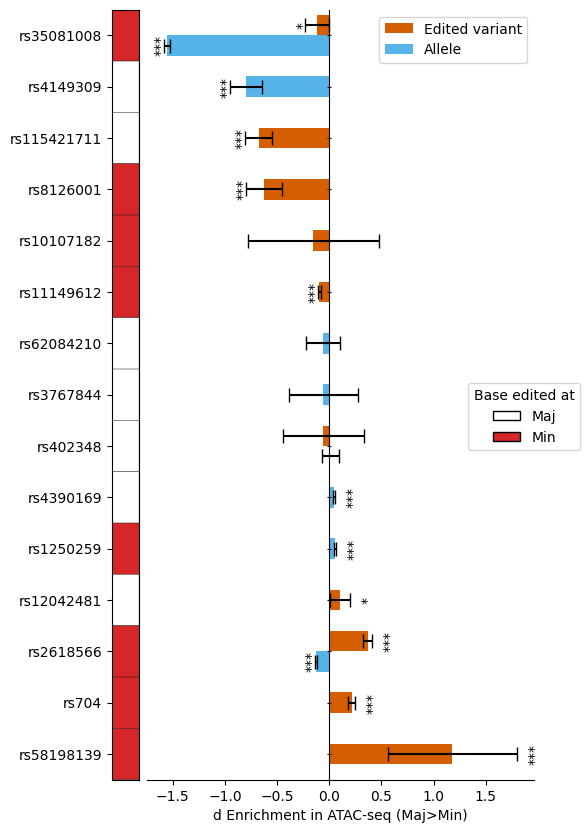

In [187]:
fig, ax = plt.subplots(figsize=(5,10), sharey=True)

# add an axes to the right of the main axes.
width = ax.get_position().x1-ax.get_position().x0
height=ax.get_position().y1-ax.get_position().y0
margin = height / (len(atac_all)+1)
cax = fig.add_axes([ax.get_position().x0-width*0.09,
                          ax.get_position().y0,
                          width*0.07,
                          height])

ax.set_ylim((-0.5, 14.5))
atac_all['mean_b'] = atac_all[['b|atac_any', 'b|atac_caqtl_any']].mean(axis=1)
atac_all = atac_all.sort_values('mean_b').reset_index(drop=True)
ax.barh(
    atac_all.index.astype(float)-0.2*atac_all.has_both.astype(float), 
    atac_all['b|atac_any'], 
    xerr=atac_all[['b_lower_error|atac_any','b_upper_error|atac_any']].T.values, 
    capsize=5, 
    label = 'Edited variant', 
    color = pal[3], 
    height=0.4
)

delta = 0.1
for idx, row in atac_all.iterrows():
    if row['b|atac_any'] >= 0:
        x = row['b_upper_error|atac_any'] + row['b|atac_any'] + delta
    elif row['b|atac_any'] < 0:
        x = row['b|atac_any'] - row['b_lower_error|atac_any'] - delta
    elif np.isnan(row['b|atac_any']):
        continue
    else:
        raise ValueError("Invalid b|atac_any")
    y = float(idx)-0.2*float(row["has_both"])
    ax.text(x, y, fwer_stars(row["p_adj|atac_any"]), rotation='vertical', verticalalignment='center')

ax.barh(
    atac_all.index.astype(float)+0.2*atac_all.has_both.astype(float), 
    atac_all['b|atac_caqtl_any'], 
    xerr=atac_all[['b_lower_error|atac_caqtl_any','b_upper_error|atac_caqtl_any']].T.values, 
    capsize=5, 
    label = 'Allele', 
    color = pal[-1], 
    height=0.4
)

for idx, row in atac_all.iterrows():
    if row['b|atac_caqtl_any'] >= 0:
        x = row['b_upper_error|atac_caqtl_any'] + row['b|atac_caqtl_any'] + delta
    elif row['b|atac_caqtl_any'] < 0:
        x = row['b|atac_caqtl_any'] - row['b_lower_error|atac_caqtl_any'] - delta
    elif np.isnan(row['b|atac_caqtl_any']):
        continue
    else:
        raise ValueError("Invalid b|atac_caqtl_any")
    y = float(idx)+0.2*float(row["has_both"])
    ax.text(x, y, fwer_stars(row["p_adj|atac_caqtl_any"]), rotation='vertical', verticalalignment='center')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_position('zero')
cmap = ListedColormap([sns.color_palette()[3], 'black', 'white'])
cax.pcolor(atac_all[['maj_min_direction']]+1, cmap=cmap, edgecolors='k')
cax.set_ylabel("")

#ax.set_ylim([0.5, len(atac_all)])
ax.axvline(0, c = 'black', linewidth = 0.5)
ax.axvline(0, c = 'black', linewidth = 0.5)
ax.legend()
ax.set_xlabel("d Enrichment in ATAC-seq (Maj>Min)")
ax.set_yticks(atac_all.index,
              labels=[])
ax.tick_params(axis='y', direction='inout')
cax.set_yticks(atac_all.index+0.5)
cax.set_xticks([], labels=[])
#cax.set_xlabel("Edit")
cax.set_yticklabels(atac_all.target.map(lambda s: s.split("_")[0]))
ax.invert_yaxis()
cax.invert_yaxis()

legend_elements = [Patch(facecolor='white', edgecolor='k',
                         label='Maj'),
                  Patch(facecolor=sns.color_palette()[3], edgecolor='k',
                         label='Min')]
fig.legend(handles=legend_elements, loc='center right', title="Base edited at")
fig.savefig("4d_ATAC_enrichment.pdf", bbox_inches="tight")

In [202]:
atac_all[['target', 'p|atac_caqtl_any']]

,target,p|atac_caqtl_any
0,rs35081008_Min_ABE_465,0.000000e+00
1,rs4149309_Maj_ABE_206,3.789923e-25
2,rs115421711_Maj_ABE_45,NaN
3,rs8126001_Min_ABE_574,NaN
4,rs10107182_Min_ABE_351,NaN
5,rs11149612_Min_ABE_369,NaN
6,rs62084210_Maj_ABE_250,7.312000e-01
7,rs3767844_Maj_ABE_192,7.934388e-01
8,rs402348_Maj_ABE_201,7.934388e-01
9,rs4390169_Maj_ABE_208,4.810400e-20


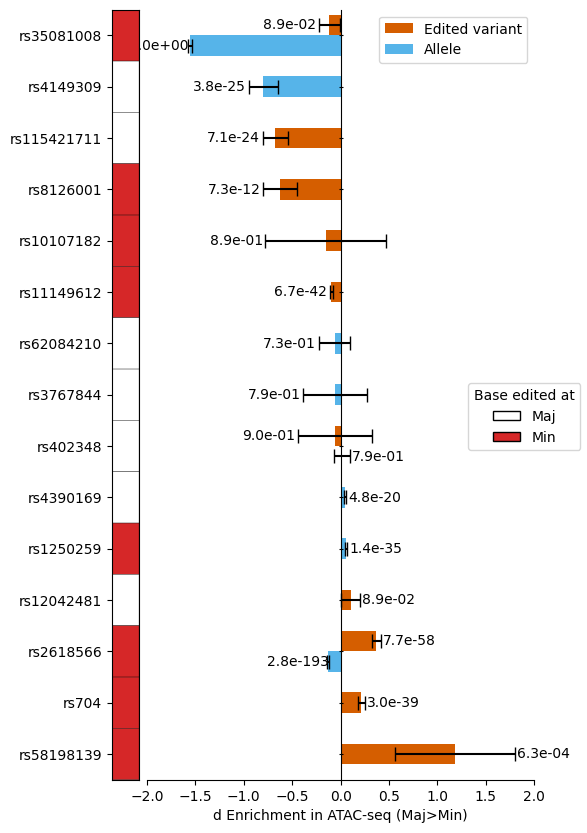

In [208]:
fig, ax = plt.subplots(figsize=(5,10), sharey=True)

# add an axes to the right of the main axes.
width = ax.get_position().x1-ax.get_position().x0
height=ax.get_position().y1-ax.get_position().y0
margin = height / (len(atac_all)+1)
cax = fig.add_axes([ax.get_position().x0-width*0.09,
                          ax.get_position().y0,
                          width*0.07,
                          height])

ax.set_ylim((-0.5, 14.5))
atac_all['mean_b'] = atac_all[['b|atac_any', 'b|atac_caqtl_any']].mean(axis=1)
atac_all = atac_all.sort_values('mean_b').reset_index(drop=True)
ax.barh(
    atac_all.index.astype(float)-0.2*atac_all.has_both.astype(float), 
    atac_all['b|atac_any'], 
    xerr=atac_all[['b_lower_error|atac_any','b_upper_error|atac_any']].T.values, 
    capsize=5, 
    label = 'Edited variant', 
    color = pal[3], 
    height=0.4
)

delta = 0.3
for idx, row in atac_all.iterrows():
    if row['b|atac_any'] >= 0:
        x = row['b_upper_error|atac_any'] + row['b|atac_any'] + delta
    elif row['b|atac_any'] < 0:
        x = row['b|atac_any'] - row['b_lower_error|atac_any'] - delta
    elif np.isnan(row['b|atac_any']):
        continue
    else:
        raise ValueError("Invalid b|atac_any")
    y = float(idx)-0.2*float(row["has_both"])
    ax.text(x, y, f'{row["p_adj|atac_any"]:.1e}', horizontalalignment='center', verticalalignment='center')

ax.barh(
    atac_all.index.astype(float)+0.2*atac_all.has_both.astype(float), 
    atac_all['b|atac_caqtl_any'], 
    xerr=atac_all[['b_lower_error|atac_caqtl_any','b_upper_error|atac_caqtl_any']].T.values, 
    capsize=5, 
    label = 'Allele', 
    color = pal[-1], 
    height=0.4
)

for idx, row in atac_all.iterrows():
    if row['b|atac_caqtl_any'] >= 0:
        x = row['b_upper_error|atac_caqtl_any'] + row['b|atac_caqtl_any'] + delta
    elif row['b|atac_caqtl_any'] < 0:
        x = row['b|atac_caqtl_any'] - row['b_lower_error|atac_caqtl_any'] - delta
    elif np.isnan(row['b|atac_caqtl_any']):
        continue
    else:
        raise ValueError("Invalid b|atac_caqtl_any")
    y = float(idx)+0.2*float(row["has_both"])
    ax.text(x, y, f'{row["p_adj|atac_caqtl_any"]:.1e}', horizontalalignment='center', verticalalignment='center')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_position('zero')
cmap = ListedColormap([sns.color_palette()[3], 'black', 'white'])
cax.pcolor(atac_all[['maj_min_direction']]+1, cmap=cmap, edgecolors='k')
cax.set_ylabel("")

#ax.set_ylim([0.5, len(atac_all)])
ax.axvline(0, c = 'black', linewidth = 0.5)
ax.axvline(0, c = 'black', linewidth = 0.5)
ax.legend()
ax.set_xlabel("d Enrichment in ATAC-seq (Maj>Min)")
ax.set_yticks(atac_all.index,
              labels=[])
ax.tick_params(axis='y', direction='inout')
cax.set_yticks(atac_all.index+0.5)
cax.set_xticks([], labels=[])
#cax.set_xlabel("Edit")
cax.set_yticklabels(atac_all.target.map(lambda s: s.split("_")[0]))
ax.invert_yaxis()
cax.invert_yaxis()
ax.set_xlim((-2, 2))
legend_elements = [Patch(facecolor='white', edgecolor='k',
                         label='Maj'),
                  Patch(facecolor=sns.color_palette()[3], edgecolor='k',
                         label='Min')]
fig.legend(handles=legend_elements, loc='center right', title="Base edited at")
fig.savefig("4d_ATAC_enrichment_pval.pdf", bbox_inches="tight")

ValueError: Could not interpret value `kind` for parameter `hue`

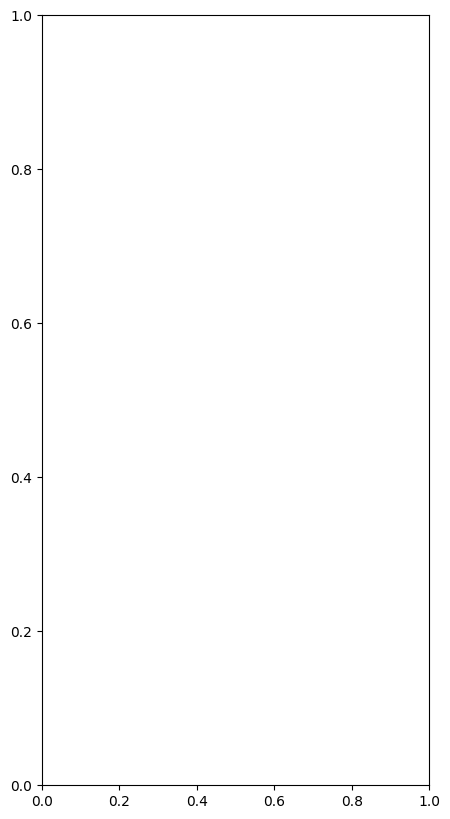

In [174]:
fig, ax = plt.subplots(figsize=(5,10), sharey=True)

atac_all['mean_b'] = atac_all[['b|atac_any', 'b|atac_caqtl_any']].mean(axis=1)
atac_all = atac_all.sort_values('mean_b').reset_index(drop=True)
sns.catplot(
    x=atac_all['b|atac_any'], 
    y=atac_all.index.astype(float), 
    xerr=atac_all[['b_lower_error|atac_any','b_upper_error|atac_any']].T.values, 
    capsize=10, 
    label = 'Edited variant', 
    hue='kind',
    orient='h'
)
ax.errorbar(
    atac_all['b|atac_any'], 
    atac_all.index.astype(float), 
    xerr=atac_all[['b_lower_error|atac_any','b_upper_error|atac_any']].T.values, 
    fmt = '.', 
    capsize=10, 
    label = 'Edited variant', 
    c = pal[3], 
    markersize = 10
)

ax.errorbar(
    atac_all['b|atac_caqtl_any'],
    atac_all.index.astype(float), 
    xerr=atac_all[['b_lower_error|atac_caqtl_any','b_upper_error|atac_caqtl_any']].T.values, 
    fmt = '.', 
    label = 'caQTL', 
    capsize=10, 
    c = pal[-1], markersize=10
)


ax.axvline(0, c = 'black', linewidth = 0.5)
ax.axvline(0, c = 'black', linewidth = 0.5)
fig.legend(loc = "center left", bbox_to_anchor=(0.9, 0.5))
ax.set_ylabel("Variant")
ax.set_xlabel("Enrichment in ATAC-seq")
ax.set_yticks(atac_all.index)
ax.set_yticklabels(atac_all.target.map(lambda s: s.split("_")[0]))
#fig.savefig("Supp_ATAC_enrichment.pdf", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
atac_sig = atac_all.loc[atac_all['sig(a=0.1)|atac'] == True]
atac_insig = atac_all.loc[(atac_all['sig(a=0.1)|atac'] != True)]
ax.errorbar(atac_sig.index.astype(float), atac_sig['b|atac'], atac_sig[['b_lower_error|atac','b_upper_error|atac']].T.values, fmt = 'X', capsize=10, label = 'ATAC (p_adj<0.1)', c = pal[3], markersize = 10)
ax.errorbar(atac_insig.index.astype(float), atac_insig['b|atac'], atac_insig[['b_lower_error|atac','b_upper_error|atac']].T.values, fmt = 'o', capsize=10, label = 'ATAC', c = pal[3])

interaction_sig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac'] == True]
interaction_insig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac'] != True]
ax.errorbar(interaction_sig.index.astype(float)+0.2, interaction_sig['b|ser*atac'],
            interaction_sig[['b_lower_error|ser*atac','b_upper_error|ser*atac']].T.values, fmt = 'X', capsize=10, label = "interaction (p_adj<0.1)",  c = pal[1], markersize=10)
ax.errorbar(interaction_insig.index.astype(float)+0.2, interaction_insig['b|ser*atac'],
            interaction_insig[['b_lower_error|ser*atac','b_upper_error|ser*atac']].T.values, fmt = 'o', capsize=10, label = "interaction",  c = pal[1], )

caqtl_sig = atac_all.loc[atac_all['sig(a=0.1)|atac_caqtl'] == True]
caqtl_insig = atac_all.loc[atac_all['sig(a=0.1)|atac_caqtl'] != True]
ax.errorbar(caqtl_sig.index.astype(float)+0.2, caqtl_sig['b|atac_caqtl'],
            caqtl_sig[['b_lower_error|atac_caqtl','b_upper_error|atac_caqtl']].T.values, fmt = 'X', capsize=10, label = "caQTL (p_adj<0.1)",  c = pal[-1], markersize=10)
ax.errorbar(caqtl_insig.index.astype(float)+0.2, caqtl_insig['b|atac_caqtl'],
            caqtl_insig[['b_lower_error|atac_caqtl','b_upper_error|atac_caqtl']].T.values, fmt = 'o', capsize=10, label = "caQTL",  c = pal[-1], )

caqtl_interaction_sig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac_caqtl'] == True]
caqtl_interaction_insig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac_caqtl'] != True]
ax.errorbar(caqtl_interaction_sig.index.astype(float)+0.2, interaction_sig['b|ser*atac'],
            caqtl_interaction_sig[['b_lower_error|ser*atac_caqtl','b_upper_error|ser*atac_caqtl']].T.values, fmt = 'X', capsize=10, label = "interaction (p_adj<0.1)",  c = pal[0], markersize=10)
ax.errorbar(interaction_insig.index.astype(float)+0.2, interaction_insig['b|ser*atac'],
            interaction_insig[['b_lower_error|ser*atac_caqtl','b_upper_error|ser*atac_caqtl']].T.values, fmt = 'o', capsize=10, label = "interaction",  c = pal[0], )

ax.axhline(0, c = 'black', linewidth = 0.5)
fig.legend(loc = "center left", bbox_to_anchor=(0.9, 0.5))
ax.set_ylabel("Enrichment")
ax.set_xticks(atac_all.index)
ax.set_xticklabels(atac_all.target.map(lambda s: s.split("_")[0]), rotation=90)
fig.savefig("Supp_ATAC_enrichment_with_interaction.pdf", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
atac_sig = atac_all.loc[atac_all['sig(a=0.1)|atac'] == True]
atac_insig = atac_all.loc[(atac_all['sig(a=0.1)|atac'] != True)]
ax.errorbar(atac_sig.index.astype(float), atac_sig['b|atac'], atac_sig[['b_lower_error|atac','b_upper_error|atac']].T.values, fmt = 'X', capsize=10, label = 'ATAC (p_adj<0.1)', c = pal[3], markersize = 10,)
ax.errorbar(atac_insig.index.astype(float), atac_insig['b|atac'], atac_insig[['b_lower_error|atac','b_upper_error|atac']].T.values, fmt = 'o', capsize=10, label = 'ATAC', c = pal[3])

interaction_sig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac'] == True]
interaction_insig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac'] != True]
ax.errorbar(interaction_sig.index.astype(float)+0.2, interaction_sig['b|ser*atac'],
            interaction_sig[['b_lower_error|ser*atac','b_upper_error|ser*atac']].T.values, fmt = 'X', capsize=10, label = "interaction (p_adj<0.1)",  c = pal[1], markersize=10)
ax.errorbar(interaction_insig.index.astype(float)+0.2, interaction_insig['b|ser*atac'],
            interaction_insig[['b_lower_error|ser*atac','b_upper_error|ser*atac']].T.values, fmt = 'o', capsize=10, label = "interaction",  c = pal[1], )

caqtl_sig = atac_all.loc[atac_all['sig(a=0.1)|atac_caqtl'] == True]
caqtl_insig = atac_all.loc[atac_all['sig(a=0.1)|atac_caqtl'] != True]
ax.errorbar(caqtl_sig.index.astype(float)+0.2, caqtl_sig['b|atac_caqtl'],
            caqtl_sig[['b_lower_error|atac_caqtl','b_upper_error|atac_caqtl']].T.values, fmt = 'X', capsize=10, label = "caQTL (p_adj<0.1)",  c = pal[-1], markersize=10)
ax.errorbar(caqtl_insig.index.astype(float)+0.2, caqtl_insig['b|atac_caqtl'],
            caqtl_insig[['b_lower_error|atac_caqtl','b_upper_error|atac_caqtl']].T.values, fmt = 'o', capsize=10, label = "caQTL",  c = pal[-1], )

caqtl_interaction_sig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac_caqtl'] == True]
caqtl_interaction_insig = atac_all.loc[atac_all['sig(a=0.1)|ser*atac_caqtl'] != True]
ax.errorbar(caqtl_interaction_sig.index.astype(float)+0.2, caqtl_interaction_sig['b|ser*atac_caqtl'],
            caqtl_interaction_sig[['b_lower_error|ser*atac_caqtl','b_upper_error|ser*atac_caqtl']].T.values, fmt = 'X', capsize=10, label = "interaction (p_adj<0.1)",  c = pal[0], markersize=10)
ax.errorbar(interaction_insig.index.astype(float)+0.2, caqtl_interaction_insig['b|ser*atac_caqtl'],
            interaction_insig[['b_lower_error|ser*atac_caqtl','b_upper_error|ser*atac_caqtl']].T.values, fmt = 'o', capsize=10, label = "interaction",  c = pal[0], )

ax.axhline(0, c = 'black', linewidth = 0.5)
fig.legend(loc = "center left", bbox_to_anchor=(0.9, 0.5))
ax.set_ylabel("Enrichment")
ax.set_xticks(atac_all.index)
ax.set_xticklabels(atac_all.target.map(lambda s: s.split("_")[0]), rotation=90)
fig.savefig("Supp_ATAC_enrichment_with_interaction.pdf", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()
ax.scatter(atac_be_filtered['mu_z_adj'], atac_be_filtered['p|atac'].map(lambda p: -np.log10(p)))
ax.set_ylim((-20, 60))
texts = []
for i, txt in enumerate(atac_be_filtered.target.tolist()):
    texts.append(ax.text(atac_be_filtered['mu_z_adj'].tolist()[i], atac_be_filtered['p|atac'].map(lambda p: -np.log10(p)).tolist()[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), force_text=(0.2, 0.5), force_static=(0.5, 1), ax = ax)


In [ ]:
tbl

In [ ]:
tbl = var_info_tbl.loc[var_info_tbl.target_group == "Variant",:].copy()
tbl['abs_mu'] = tbl.mu.abs()
tbl = tbl.sort_values('abs_mu', ascending=False).reset_index()
tbl.loc[tbl.target == "rs35081008_Min_ABE_465"]

In [ ]:
tbl = var_info_tbl.loc[var_info_tbl.target_group == "Variant",:].copy()
tbl['abs_mu_z'] = tbl.mu_z_adj.abs()
tbl = tbl.sort_values('abs_mu_z', ascending=False).reset_index()
tbl.loc[tbl.target == "rs35081008_Min_ABE_465"]

In [ ]:
48/583

In [ ]:
var_info_tbl[['mu']]

In [ ]:
atac_be_tbl